In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [3]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

from sklearn.preprocessing import LabelEncoder
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
def my_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv('titanic_train.csv')
y_df = df['Survived']
X_df = df.drop('Survived', axis=1)
X_df = transform_features(X_df)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)

lr = LogisticRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
my_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


/home/arti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
pred_proba = lr.predict_proba(X_test)
pred = lr.predict(X_test)
pred_proba.shape

(179, 2)

In [8]:
import numpy as np
pred_proba[:3]

array([[0.46163937, 0.53836063],
       [0.87859074, 0.12140926],
       [0.87724539, 0.12275461]])

In [9]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
pred_proba_result[:3]

array([[0.46163937, 0.53836063, 1.        ],
       [0.87859074, 0.12140926, 0.        ],
       [0.87724539, 0.12275461, 0.        ]])

In [10]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
binarizer.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [11]:
threshold = 0.5

proba = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(proba)
pred1 = binarizer.transform(proba)

my_eval(y_test, pred1)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [12]:
threshold=0.4
proba = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(proba)
pred1 = binarizer.transform(proba)

my_eval(y_test, pred1)

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


In [13]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_evals(y_test, proba, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(proba)
        pred1 = binarizer.transform(proba)
        my_eval(y_test, pred1)
        
        
proba = pred_proba[:, 1].reshape(-1, 1)
get_evals(y_test, proba, thresholds)


오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


In [14]:
from sklearn.metrics import precision_recall_curve

proba = lr.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, proba)
thresholds.shape

(143,)

In [15]:
thr_index = np.arange(0, thresholds.shape[0], 15)
thr_index

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135])

In [16]:
np.round(thresholds[thr_index], 2)

array([0.1 , 0.12, 0.14, 0.19, 0.28, 0.4 , 0.56, 0.67, 0.82, 0.95])

In [17]:
precisions[thr_index]

array([0.38853503, 0.44029851, 0.46610169, 0.53921569, 0.64705882,
       0.72857143, 0.83636364, 0.94871795, 0.95833333, 1.        ])

In [18]:
recalls[thr_index]

array([1.        , 0.96721311, 0.90163934, 0.90163934, 0.90163934,
       0.83606557, 0.75409836, 0.60655738, 0.37704918, 0.14754098])

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

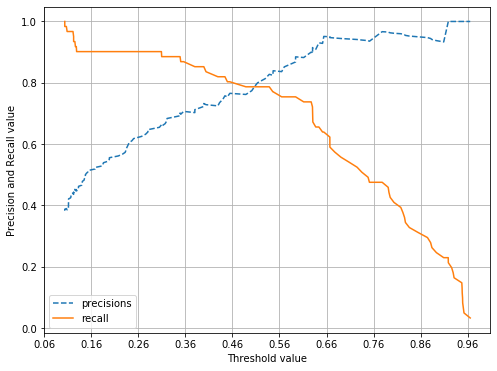

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[0: thresholds.shape[0]], linestyle='--', label='precisions')
plt.plot(thresholds, recalls[0: thresholds.shape[0]], label='recall')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()
plt.show()

In [21]:
# 04_F1 Score
from sklearn.metrics import f1_score

f1_score(y_test, pred)

0.7804878048780488

In [22]:
# 05_ROC 곡선과 AUC
from sklearn.metrics import roc_curve

proba = lr.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, proba)

thr_index = np.arange(1, thresholds.shape[0], 5)
thr_index

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51])

In [23]:
np.round(thresholds[thr_index], 2)

array([0.97, 0.65, 0.63, 0.56, 0.45, 0.38, 0.31, 0.13, 0.12, 0.11, 0.1 ])

In [24]:
np.round(fprs[thr_index], 3)

array([0.   , 0.017, 0.034, 0.076, 0.127, 0.186, 0.237, 0.576, 0.619,
       0.754, 0.814])

In [25]:
np.round(tprs[thr_index], 3)

array([0.033, 0.639, 0.705, 0.754, 0.803, 0.852, 0.902, 0.902, 0.951,
       0.967, 1.   ])

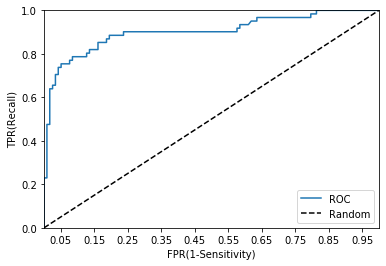

In [26]:
plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1], [0,1], 'k--', label='Random')
start,end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR(1-Sensitivity)')
plt.ylabel('TPR(Recall)')
plt.legend()

In [27]:
from sklearn.metrics import roc_auc_score

In [29]:
print(confusion_matrix(y_test, pred))

[[104  14]
 [ 13  48]]


In [30]:
roc_auc_score(y_test, proba)

0.902542372881356